In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [8]:
data=pd.read_csv('insurance_data.csv')

In [9]:
data.head(5)

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [10]:
x = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [11]:
print(x)

[[22]
 [25]
 [47]
 [52]
 [46]
 [56]
 [55]
 [60]
 [62]
 [61]
 [18]
 [28]
 [27]
 [29]
 [49]
 [55]
 [25]
 [58]
 [19]
 [18]
 [21]
 [26]
 [40]
 [45]
 [50]
 [54]
 [23]]


In [12]:
print(y)

[0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0]


In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.svm import LinearSVC

In [15]:
regressor=LinearSVC()
regressor.fit(x_train,y_train)

C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\KIIT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [16]:
y_prediction=regressor.predict(x_test)

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_prediction)

array([[1, 0],
       [0, 5]], dtype=int64)

In [18]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_prediction))

1.0


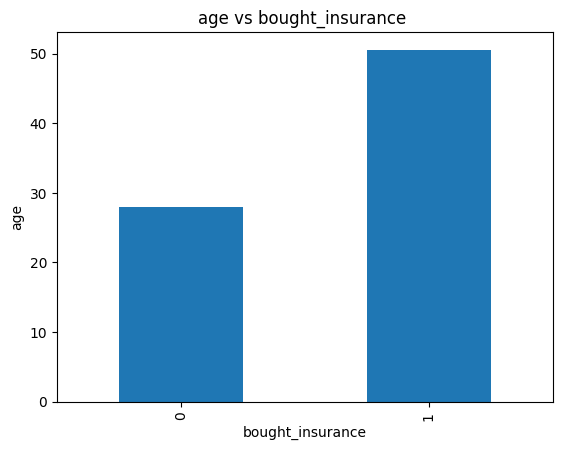

In [20]:
grouped = data.groupby('bought_insurance')['age'].mean()
grouped.plot(kind='bar')
plt.xlabel('bought_insurance')
plt.ylabel('age')
plt.title('age vs bought_insurance ')
plt.show()

In [21]:
regressor.score(x_test,y_test)


1.0

Training Accuracy : 0.8571428571428571
Testing Accuracy : 1.0

CLASSIFICATION REPORT

              precision    recall  f1-score   support

  not bought       1.00      1.00      1.00         1
      bought       1.00      1.00      1.00         5

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6


CONFUSION MATRIX


<Axes: >

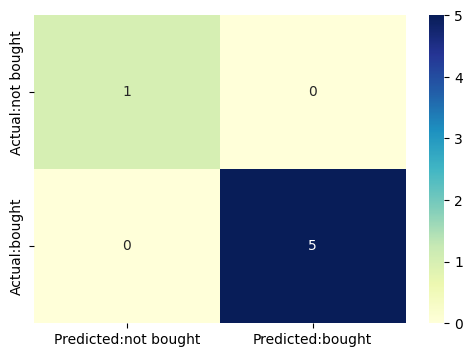

In [26]:
# creating confusing matrix
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
print('Training Accuracy :',regressor.score(x_train,y_train))
print('Testing Accuracy :',regressor.score(x_test,y_test))
con_mat = pd.DataFrame(confusion_matrix(regressor.predict(x_test), y_test),columns = ['Predicted:not bought', 'Predicted:bought'], index = ['Actual:not bought', 'Actual:bought'])


print('\nCLASSIFICATION REPORT\n')
print(classification_report(regressor.predict(x_test), y_test,target_names =['not bought','bought']))

print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")